Consider:
$$
P_\lambda(x) = 
\begin{cases} 
      \frac{\exp(-x/\lambda)}{Z(\lambda)} & 1 < x < 20 \\
      0 & otherwise \\
   \end{cases}
$$


__1) Compute $Z(λ)$ such that the probability is normalized. What is the probability $P_λ(\{x\})$ to observe a set of n events $(\{x\})$ ? Write a program that output n such observations sampled from the probability distribution.__

$Z(λ)$ is easily calculate in the following:
$$
Z(\lambda) = \int_{1}^{20} \exp(-x/\lambda) \;\mathrm{d}x = -\lambda \exp(-x/\lambda) \Big|_1^{20} = \lambda \cdot \left[\exp(-20/\lambda) - \exp(-1/\lambda)\right]
$$
$P_λ({x})$ is simply obtained exploiting independence, therefore:
$$
P_λ(\{x\}_N) = \prod_{i}^NP_λ(x_i) = 
\begin{cases} 
      \frac{\exp(-\sum_{i}^Nx_i/\lambda)}{Z(\lambda)^N} & 1 < x_i < 20 \\
      0 & otherwise \\
   \end{cases}
$$

In [2]:
import random

def rand_exp_krz(lamda, xmin, xmax):
    x = random.expovariate(1/lamda)
    while (x <= xmin or x >= xmax):
        x = random.expovariate(1/lamda)
    return x        

We prove below that the fuction above generates point with the desired distribution. The resulting plots will also show a sample output.

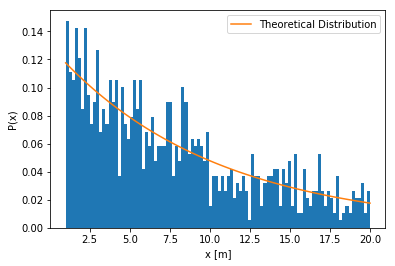

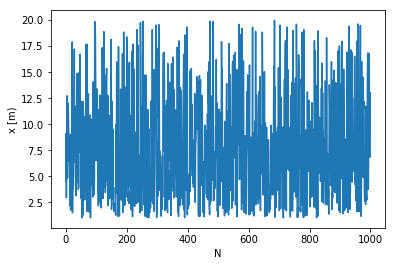

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_of_trials = 1000
lamda = 10
xmin = 1
xmax = 20

sample = []
teo_prob = []

for i in range(num_of_trials):
    x = rand_exp_krz(lamda, xmin, xmax)
    sample.append(x)
        
z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
x = np.linspace(1,20,100) # 100 linearly spaced numbers
y = np.exp(-x/lamda)/z

plt.hist(sample, normed=True, bins=100)
plt.plot(x, y, label='Theoretical Distribution')
plt.legend(loc='upper right')
plt.xlabel('x [m]')
plt.ylabel('P(x)')
plt.show()     

plt.plot(range(num_of_trials), sample)
plt.xlabel('N')
plt.ylabel('x [m)')
plt.show()
        
        

__ 2) Plot the likelihood as a function of λ and see how it is peaked arround the true value. __

In [4]:
from math import exp

def prob_exp_krz(lamda, xmin, xmax, x):
    z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
    return exp(-x/lamda)/z
    

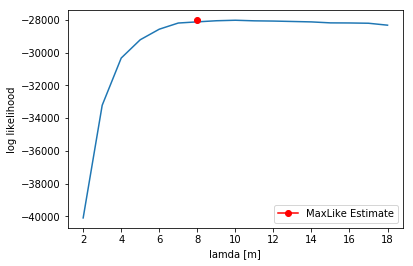

In [5]:
from math import log

import numpy as np
import matplotlib.pyplot as plt

num_of_trials = 10000
lamda_true = 10
xmin = 1
xmax = 20
log_like = []


for lamda in range(2, 19):  
    log_like_tmp = 0
    for i in range(num_of_trials):
        x = rand_exp_krz(lamda_true, xmin, xmax) 
        log_like_tmp+=log(prob_exp_krz(lamda, xmin, xmax, x))  
    log_like.append(log_like_tmp)  
    
plt.plot(range(2, 19), log_like)
plt.plot([log_like.index(max(log_like))], [max(log_like)], label='MaxLike Estimate', marker='o', markersize=6, color="red")
plt.legend(loc='lower right')
plt.xlabel('lamda [m]')
plt.ylabel('log likelihood')
plt.show()

__3) Maximum Likelihood Estimator__
$$
\DeclareMathOperator*{\argmax}{arg\,max}
\hat{\lambda_{ML}} \left(\{x\}\right) = \argmax_\lambda P_\lambda \left(\{x\}\right)
$$

Analyze how well the estimator performs.

The mean squared error is 1.92067696398952


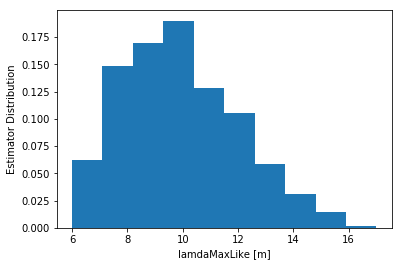

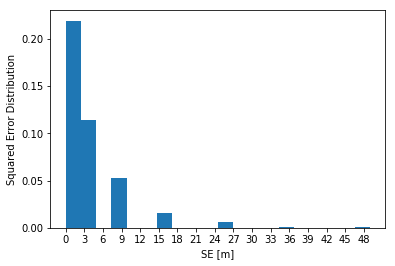

In [14]:
from math import exp
from math import log
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

num_of_trials = 1000
lamda_true = 10
xmin = 1
xmax = 20

lamda_estimator = []
squared_error = []
max_like = []

for k in range(1000):
    for lamda in range(2, 19):  
        max_like_tmp = 0
        sum_x = 0
        for i in range(num_of_trials):
            x = rand_exp_krz(lamda_true, xmin, xmax) 
            sum_x += x
        
        z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
        max_like_tmp = -sum_x/lamda -num_of_trials*log(z) #use logarithms
        max_like.append(max_like_tmp)
    
    lamda_estimator.append(max_like.index(max(max_like)) + 2) 
    squared_error.append((max_like.index(max(max_like)) + 2 - lamda_true)**2)
    del max_like[:]
    
print('The mean squared error is', sqrt(np.mean(squared_error)), '.')    

plt.hist(lamda_estimator, normed=True, bins=10)
plt.xlabel('lamdaMaxLike [m]')
plt.ylabel('Estimator Distribution')
plt.show()   

plt.hist(squared_error, normed=True, bins=20)
plt.xticks(np.arange(0, max(squared_error)+1, 3.0))
plt.xlabel('SE [m]')
plt.ylabel('Squared Error Distribution')
plt.show() 

__4) Goodness of estimator__

We now want to study the goodness of the estimator by studying the risk function.
$$
R\left(\hat{\lambda}, \lambda \right) = \mathbf{E}\left[ \left(\hat{\lambda} - \lambda \right)^2 \right]
$$

To this end, we will plot the risk function against $\lambda$ so that we can check how well the estimator does for all possible parameters. We compare the plot with the bound on such risk function imposed by the theorem of Cramers-Rao (although we will pretend our estimator is unbiased, which is true only asymptotically).



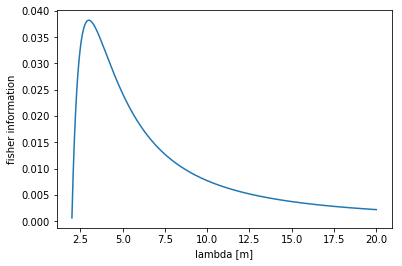

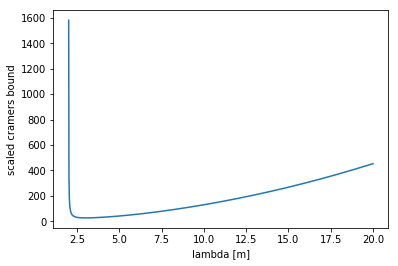

In [57]:
from math import log
from math import exp

import numpy as np
import matplotlib.pyplot as plt

def log_z(xmin, xmax, lamda):
    return log(lamda*exp(-xmin/lamda)+exp(-xmax/lamda))

def fisher_information(xmin, xmax, lamda):
    eps = 0.0001*lamda
    dd_logz = (log_z(xmin, xmax, lamda+2*eps) - 2*log_z(xmin, xmax, lamda+eps) + log_z(xmin, xmax, lamda))/(eps*eps)       
    return dd_logz + 2/(lamda*lamda)

fisher = []
cramers_bound = []
x = np.linspace(2, 20, 1000)
for i in range(1000):
    fisher.append(fisher_information(xmin, xmax, x[i]))
    cramers_bound.append(1/fisher_information(xmin, xmax, x[i]))
    
plt.plot(x, fisher)
plt.xlabel('lambda [m]')
plt.ylabel('fisher information')
plt.show()

plt.plot(x, cramers_bound)
plt.xlabel('lambda [m]')
plt.ylabel('scaled cramers bound')
plt.show()
    
    
   

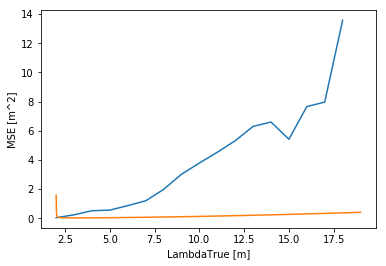

In [61]:
from math import exp
from math import log
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

num_of_trials = 1000
num_of_samples = 100
xmin = 1
xmax = 20

mean_squared_error = []
max_like = []

for lamda_true in range(2, 19):
    mean_squared_error_tmp = 0
    for k in range(num_of_samples):
        for lamda in range(2, 19):  
            max_like_tmp = 0
            sum_x = 0
            for i in range(num_of_trials):
                x = rand_exp_krz(lamda_true, xmin, xmax) 
                sum_x += x
        
            z = lamda*(exp(-xmin/lamda)-exp(-xmax/lamda))  
            max_like_tmp = -sum_x/lamda -num_of_trials*log(z) #use logarithms
            max_like.append(max_like_tmp)
    
        mean_squared_error_tmp += (max_like.index(max(max_like)) + 2 - lamda_true)**2
        del max_like[:]
        
    mean_squared_error_tmp/=num_of_samples 
    mean_squared_error.append(mean_squared_error_tmp)

    
cramers_bound = []
lam = np.linspace(2, 19, 1000)
for i in range(1000):
    cramers_bound.append(1/(num_of_trials*fisher_information(xmin, xmax, lam[i])))
    
plt.plot(range(2, 19), mean_squared_error)
plt.plot(lam, cramers_bound)
plt.xlabel('LambdaTrue [m]')
plt.ylabel('MSE [m^2]')
plt.show()    